In [1]:
# Magic methods that automatically update changes to imported python functions

%load_ext autoreload
%autoreload 2

In [2]:
year = 2019
url = f'https://api.census.gov/data/{year}/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'

## Questions to Answer

1. Question 1 - Visual Type A : Time in business vs Wealth
2. Question 2 - Visual Type A : Size of business vs Wealth
3. Question 3 - Visual Type B : Employee Size vs Wealth

4. Question 4 - Visual Type A : Demographic of Employees
5. Question 5 - Visual Type A : Demographic of Employees
6. Question 6 - Visual Type B : Demographic of Employees

7. Question 7 - Visual Type A : Wealth by Business Type
8. Question 8 - Visual Type A : Wealth by Location
9. Question 9 - Visual Type B : Mystery Question


In [3]:
import requests
import pandas as pd

YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')
ReceiptSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA03-2023-04-20T164951.csv')
EmploymentSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA04-2023-04-20T164954.csv')

listOfDF = [YearinBusinessDF, ReceiptSizeOfFirmDF, EmploymentSizeOfFirmDF]

response = requests.get(url)
response

<Response [200]>

In [4]:
# The easy way to read in API data

data = response.json()

col = data[0]

df = pd.DataFrame(data[1:], columns=col)

colToDrop = ['GEO_ID', 'NAME', f'NAICS{year - 1}', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'PAYANN_F',
 'FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'RCPPDEMP_S', 'RCPPDEMP_S_F', 'EMP_S', 'EMP_S_F', 'PAYANN_S',
 'PAYANN_S_F', 'us', 'YEAR', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'VET_GROUP', 'EMPSZFI']

# df = df.drop(columns= colToDrop, axis = 1).convert_dtypes().drop_duplicates()
# df.drop(['GEO_ID', 'NAME', f'NAICS{year - 1}', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'PAYANN_F',
#  'FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'RCPPDEMP_S', 'RCPPDEMP_S_F', 'EMP_S', 'EMP_S_F', 'PAYANN_S',
#  'PAYANN_S_F', 'us', 'YEAR', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'VET_GROUP', 'EMPSZFI']
# )

# list(df.columns)
df.head()
# df.shape

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
0,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,0.6,None,4.0,None,1.7,None,2.0,None,1
1,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,3.3,None,10.0,None,0.0,None,5.6,None,1
2,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,1.3,None,2.8,None,1.4,None,2.5,None,1
3,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,1.6,None,2.3,None,1.5,None,3.0,None,1
4,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,1.7,None,3.8,None,1.8,None,2.3,None,1


In [5]:
# Distinct column values

df[col].drop_duplicates()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
0,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,0.6,None,4.0,None,1.7,None,2.0,None,1
1,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,3.3,None,10.0,None,0.0,None,5.6,None,1
2,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,1.3,None,2.8,None,1.4,None,2.5,None,1
3,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,1.6,None,2.3,None,1.5,None,3.0,None,1
4,0100000US,United States,00,Total for all sectors,004,Equally male/female,001,Total,00,Total,...,None,1.7,None,3.8,None,1.8,None,2.3,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27788,0100000US,United States,99,Industries not classified,003,Male,001,Total,40,Black or African American,...,None,11.8,None,0.0,S,0.0,None,5.9,None,1
27789,0100000US,United States,99,Industries not classified,003,Male,001,Total,40,Black or African American,...,None,23.6,None,0.0,S,16.7,None,26.7,None,1
27790,0100000US,United States,99,Industries not classified,003,Male,001,Total,40,Black or African American,...,None,42.4,None,0.0,S,35.9,None,5.4,None,1
27791,0100000US,United States,99,Industries not classified,003,Male,001,Total,40,Black or African American,...,D,0.0,D,0.0,D,0.0,D,0.0,D,1


Columns to keep from YearinBusinessDF:

 'Geographic Area Name (NAME)',
 '2017 NAICS code (NAICS2017)',
 'Meaning of NAICS code (NAICS2017_LABEL)',
 'Meaning of Sex code (SEX_LABEL)',
 'Meaning of Ethnicity code (ETH_GROUP_LABEL)',
 'Meaning of Race code (RACE_GROUP_LABEL)',
 'Meaning of Veteran code (VET_GROUP_LABEL)',
 'Meaning of Years in business code (YIBSZFI_LABEL)',
 'Number of employer firms (FIRMPDEMP)',
 'Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)',
 'Number of employees (EMP)',
 'Annual payroll ($1,000) (PAYANN)'

Columns to remove:

 'Year (YEAR)',
 'Relative standard error of employer firms (%) (FIRMPDEMP_S)',
 'Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)',
 'Relative standard error of number of employees (%) (EMP_S)',
 'Relative standard error of annual payroll (%) (PAYANN_S)'
Column to merge from EmploymentSizeOfFirmDF:

- 'Meaning of Employment size of firms code (EMPSZFI_LABEL)'

 Column to merge from ReceiptSizeOfFirmDF:

- 'Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'

## Cleaning

- Drop columns we aren't planning to use
- Rename Columns we are planning to use
- Merge

In [6]:
YearinBusinessDF

,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Sex code (SEX_LABEL),Meaning of Ethnicity code (ETH_GROUP_LABEL),Meaning of Race code (RACE_GROUP_LABEL),Meaning of Veteran code (VET_GROUP_LABEL),Meaning of Years in business code (YIBSZFI_LABEL),Year (YEAR),Number of employer firms (FIRMPDEMP),"Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)",Number of employees (EMP),"Annual payroll ($1,000) (PAYANN)",Relative standard error of employer firms (%) (FIRMPDEMP_S),"Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)",Relative standard error of number of employees (%) (EMP_S),Relative standard error of annual payroll (%) (PAYANN_S)
0,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with less than 2 years in business,2018,"826,575","680,812,490","3,554,392","142,887,616",0.7,2.1,2.4,1.9
1,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 2 to 3 years in business,2018,"718,376","769,496,008","5,116,799","173,356,299",1.0,4.0,3.6,2.4
2,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 4 to 5 years in business,2018,"542,963","724,662,955","4,602,804","176,253,624",0.8,5.4,4.3,5.8
3,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 6 to 10 years in business,2018,"948,138","1,735,022,260","9,572,368","416,994,321",0.6,5.5,0.9,5.2
4,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 11 to 15 years in business,2018,"812,155","1,968,981,291","9,098,324","445,296,811",0.8,6.1,2.1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11583,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 2 to 3 years in business,2018,S,S,250 to 499 employees,S,S,S,S,S
11584,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 4 to 5 years in business,2018,S,S,20 to 99 employees,S,S,S,S,S
11585,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 6 to 10 years in business,2018,S,S,20 to 99 employees,S,S,S,S,S
11586,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 11 to 15 years in business,2018,S,S,0 to 19 employees,S,S,S,S,S


In [7]:
ALLcolsTodrop = ['Year (YEAR)',
                 'Relative standard error of employer firms (%) (FIRMPDEMP_S)',
                 'Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)',
                 'Relative standard error of number of employees (%) (EMP_S)',
                 'Relative standard error of annual payroll (%) (PAYANN_S)']
                   


YearinBusinessDF.drop(ALLcolsTodrop,inplace=True,axis=1)
YearinBusinessDF

,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Sex code (SEX_LABEL),Meaning of Ethnicity code (ETH_GROUP_LABEL),Meaning of Race code (RACE_GROUP_LABEL),Meaning of Veteran code (VET_GROUP_LABEL),Meaning of Years in business code (YIBSZFI_LABEL),Number of employer firms (FIRMPDEMP),"Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)",Number of employees (EMP),"Annual payroll ($1,000) (PAYANN)"
0,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with less than 2 years in business,"826,575","680,812,490","3,554,392","142,887,616"
1,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 2 to 3 years in business,"718,376","769,496,008","5,116,799","173,356,299"
2,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 4 to 5 years in business,"542,963","724,662,955","4,602,804","176,253,624"
3,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 6 to 10 years in business,"948,138","1,735,022,260","9,572,368","416,994,321"
4,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 11 to 15 years in business,"812,155","1,968,981,291","9,098,324","445,296,811"
...,...,...,...,...,...,...,...,...,...,...,...,...
11583,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 2 to 3 years in business,S,S,250 to 499 employees,S
11584,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 4 to 5 years in business,S,S,20 to 99 employees,S
11585,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 6 to 10 years in business,S,S,20 to 99 employees,S
11586,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 11 to 15 years in business,S,S,0 to 19 employees,S


In [8]:
ReceiptSizeOfFirmDF

,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Sex code (SEX_LABEL),Meaning of Ethnicity code (ETH_GROUP_LABEL),Meaning of Race code (RACE_GROUP_LABEL),Meaning of Veteran code (VET_GROUP_LABEL),"Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)",Year (YEAR),Number of employer firms (FIRMPDEMP),"Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)",Number of employees (EMP),"Annual payroll ($1,000) (PAYANN)",Relative standard error of employer firms (%) (FIRMPDEMP_S),"Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)",Relative standard error of number of employees (%) (EMP_S),Relative standard error of annual payroll (%) (PAYANN_S)
0,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of less than $5,000",2018,"36,605","83,359","92,450","4,965,554",4.2,4.6,11.8,12.4
1,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $5,000 to $9,999",2018,"39,920","277,015","41,784","1,553,295",5.8,5.7,5.0,7.9
2,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $10,000 to $24,999",2018,"114,135","1,942,119","159,352","4,643,999",2.2,2.5,22.3,21.6
3,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $25,000 to $49,999",2018,"214,105","7,993,433","243,524","5,612,759",1.6,1.8,5.5,31.3
4,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $50,000 to $99,999",2018,"481,615","35,783,909","642,540","12,197,323",1.1,1.1,2.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16481,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $50,000 to $99,999",2018,S,S,0 to 19 employees,S,S,S,S,S
16482,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $100,000 to $249,999",2018,S,S,0 to 19 employees,S,S,S,S,S
16483,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $250,000 to $499,999",2018,D,D,0 to 19 employees,D,D,D,D,D
16484,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $500,000 to $999,999",2018,D,D,20 to 99 employees,D,D,D,D,D


In [9]:
MorecolsTodrop = ['Year (YEAR)',
                 'Relative standard error of employer firms (%) (FIRMPDEMP_S)',
                 'Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)',
                 'Relative standard error of number of employees (%) (EMP_S)',
                 'Relative standard error of annual payroll (%) (PAYANN_S)']

ReceiptSizeOfFirmDF.drop(MorecolsTodrop,inplace=True,axis=1)
ReceiptSizeOfFirmDF



,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Sex code (SEX_LABEL),Meaning of Ethnicity code (ETH_GROUP_LABEL),Meaning of Race code (RACE_GROUP_LABEL),Meaning of Veteran code (VET_GROUP_LABEL),"Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)",Number of employer firms (FIRMPDEMP),"Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)",Number of employees (EMP),"Annual payroll ($1,000) (PAYANN)"
0,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of less than $5,000","36,605","83,359","92,450","4,965,554"
1,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $5,000 to $9,999","39,920","277,015","41,784","1,553,295"
2,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $10,000 to $24,999","114,135","1,942,119","159,352","4,643,999"
3,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $25,000 to $49,999","214,105","7,993,433","243,524","5,612,759"
4,United States,00,Total for all sectors,Total,Total,Total,Total,"Firms with sales/receipts of $50,000 to $99,999","481,615","35,783,909","642,540","12,197,323"
...,...,...,...,...,...,...,...,...,...,...,...,...
16481,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $50,000 to $99,999",S,S,0 to 19 employees,S
16482,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $100,000 to $249,999",S,S,0 to 19 employees,S
16483,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $250,000 to $499,999",D,D,0 to 19 employees,D
16484,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,"Firms with sales/receipts of $500,000 to $999,999",D,D,20 to 99 employees,D


In [10]:
EmploymentSizeOfFirmDF.drop(ALLcolsTodrop,inplace=True,axis=1)
EmploymentSizeOfFirmDF

,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Sex code (SEX_LABEL),Meaning of Ethnicity code (ETH_GROUP_LABEL),Meaning of Race code (RACE_GROUP_LABEL),Meaning of Veteran code (VET_GROUP_LABEL),Meaning of Employment size of firms code (EMPSZFI_LABEL),Number of employer firms (FIRMPDEMP),"Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)",Number of employees (EMP),"Annual payroll ($1,000) (PAYANN)"
0,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with no employees,"711,493","325,046,053",0,"49,465,824"
1,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 1 to 4 employees,"2,810,033","1,247,506,977","5,612,254","225,973,662"
2,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 5 to 9 employees,"948,936","1,071,154,479","6,265,576","249,456,413"
3,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 10 to 19 employees,"611,926","1,397,607,709","8,242,749","335,750,963"
4,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 20 to 49 employees,"402,704","2,421,677,332","12,161,051","526,534,406"
...,...,...,...,...,...,...,...,...,...,...,...,...
15182,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with no employees,D,D,0 to 19 employees,D
15183,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 1 to 4 employees,93,K,107,"1,575"
15184,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 5 to 9 employees,S,S,20 to 99 employees,S
15185,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,Firms with 20 to 49 employees,D,D,100 to 249 employees,D


## Merging tables


In [11]:
# mergedTable=pd.merge(YearinBusinessDF,ReceiptSizeOfFirmDF,on='Geographic Area Name (NAME)')
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)


In [12]:
mergedTables.fillna(0)


,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Sex code (SEX_LABEL),Meaning of Ethnicity code (ETH_GROUP_LABEL),Meaning of Race code (RACE_GROUP_LABEL),Meaning of Veteran code (VET_GROUP_LABEL),Meaning of Years in business code (YIBSZFI_LABEL),Number of employer firms (FIRMPDEMP),"Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)",Number of employees (EMP),"Annual payroll ($1,000) (PAYANN)","Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)"
0,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with less than 2 years in business,"826,575","680,812,490","3,554,392","142,887,616",0
1,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 2 to 3 years in business,"718,376","769,496,008","5,116,799","173,356,299",0
2,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 4 to 5 years in business,"542,963","724,662,955","4,602,804","176,253,624",0
3,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 6 to 10 years in business,"948,138","1,735,022,260","9,572,368","416,994,321",0
4,United States,00,Total for all sectors,Total,Total,Total,Total,Firms with 11 to 15 years in business,"812,155","1,968,981,291","9,098,324","445,296,811",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16481,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,S,S,0 to 19 employees,S,"Firms with sales/receipts of $50,000 to $99,999"
16482,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,S,S,0 to 19 employees,S,"Firms with sales/receipts of $100,000 to $249,999"
16483,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,D,D,0 to 19 employees,D,"Firms with sales/receipts of $250,000 to $499,999"
16484,United States,99,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,D,D,20 to 99 employees,D,"Firms with sales/receipts of $500,000 to $999,999"


In [13]:
# Possible drop Colum function

# def dropColumns(df,cols,axis):
#     df.drop(cols,inplace=True,axis=1)
#     return df

## Visualizations


In [14]:
# pip install seaborn

In [28]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

C:\Users\JaneelAbrahams\AppData\Local\Temp\ipykernel_20884\296549004.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mergedTables['Number of employer firms (FIRMPDEMP)'].dropna())


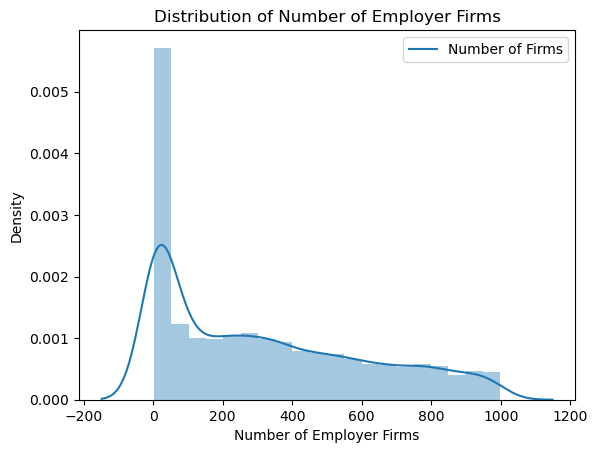

In [33]:
#converts the column to numeric with any non-numeric values replaced with NaN using the errors='coerce'
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

sns.distplot(mergedTables['Number of employer firms (FIRMPDEMP)'].dropna())

# Add title and axis labels
plt.title('Distribution of Number of Employer Firms')
plt.xlabel('Number of Employer Firms')
plt.ylabel('Density')

# Add legend
plt.legend(['Number of Firms'])

plt.show()
# sns.distplot(mergedTables['Number of employer firms (FIRMPDEMP)'].astype(float).dropna())
# plt.show()


In [19]:
# ATTEMPT FOR TREEMAP

# df = px.data.tips()
# df
# fig = px.treemap(df, path=['day', 'time', 'tip'],
#                  values='total_bill')
 
# fig.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


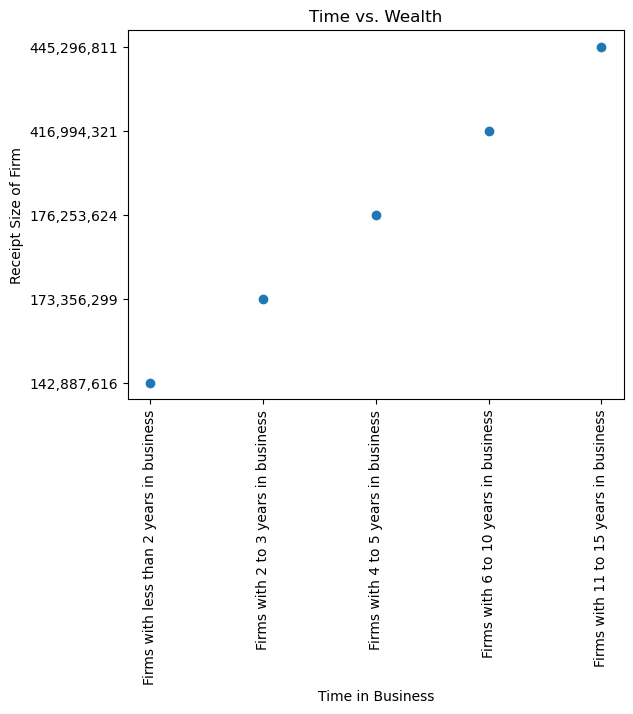

In [52]:
mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].astype(str)
plt.scatter(mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'][:5],mergedTables['Annual payroll ($1,000) (PAYANN)'][:5])
plt.xlabel('Time in Business')
plt.ylabel('Receipt Size of Firm')
plt.title('Time vs. Wealth')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
# plt.yticks(rotation=45)  # rotate x-axis labels by 45 degrees

plt.show()
